<b> Датасет: Housing.cvs як і у попередніх лабах.
</b>


Framework: TensorFlow2 + Keras (можно використовувати Pytorch)

1. Повнозв'язані нейронні мережі
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше.

Спочатку завантажимо дані та підготуємо їх для навчання нейронної мережі.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Завантаження даних
data = pd.read_csv("Housing.csv")

# Вибір числових ознак і цільової змінної
numerical_features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
X = data[numerical_features]  # Ознаки
y = data["price"]  # Цільова змінна (класифікація)

# Перетворення цільової змінної у категоріальні дані (для класифікації)
# Розділимо на 3 категорії: "низька", "середня", "висока ціна"
y = pd.qcut(y, q=3, labels=[0, 1, 2])

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділення на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Перетворення міток у числовий формат (тип int)
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

# Перевірка типів даних
print(f"Тип y_train: {y_train.dtype}, Тип y_test: {y_test.dtype}")


# Перевірка розмірів даних
print("Розмір тренувальної вибірки:", X_train.shape)
print("Розмір тестової вибірки:", X_test.shape)


Тип y_train: int64, Тип y_test: int64
Розмір тренувальної вибірки: (436, 5)
Розмір тестової вибірки: (109, 5)


Тепер побудуємо просту повнозв'язану нейронну мережу з Keras.

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.1-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.0-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.68.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Ініціалізація моделі
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Вхідний шар
    Dense(64, activation='relu'),      # Прихований шар з 64 нейронами
    Dense(32, activation='relu'),      # Ще один прихований шар
    Dense(3, activation='softmax')     # Вихідний шар: 3 категорії (класифікація)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Виведення архітектури моделі
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,563 (10.01 KB)

 Trainable params: 2,563 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

Навчаємо модель на тренувальних даних.
Використовуємо validation_data для оцінки якості на тестовій вибірці.
epochs=50: кількість епох навчання.
batch_size=32: розмір пакету даних для одного оновлення ваг.

In [7]:
# Навчання моделі
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2673 - loss: 1.1819 - val_accuracy: 0.5321 - val_loss: 1.0326
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5126 - loss: 1.0302 - val_accuracy: 0.6330 - val_loss: 0.9169
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6053 - loss: 0.9299 - val_accuracy: 0.6239 - val_loss: 0.8363
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6166 - loss: 0.8667 - val_accuracy: 0.6606 - val_loss: 0.7858
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5914 - loss: 0.8193 - val_accuracy: 0.6789 - val_loss: 0.7532
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6271 - loss: 0.7829 - val_accuracy: 0.6881 - val_loss: 0.7311
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6619 - loss: 0.7517 - val_accuracy: 0.6881 - val_loss: 0.7203
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6678 - loss: 0.7316 - val_accuracy: 0.6972 - val_loss

In [8]:
# Оцінка моделі на тестовій вибірці
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Точність моделі на тестовій вибірці: {test_accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6643 - loss: 0.7920 
Точність моделі на тестовій вибірці: 0.6789


Візуалізуємо точність та втрати на тренувальній і тестовій вибірках.
Це допоможе зрозуміти, як модель навчалася та чи не стала вона перенавченою.


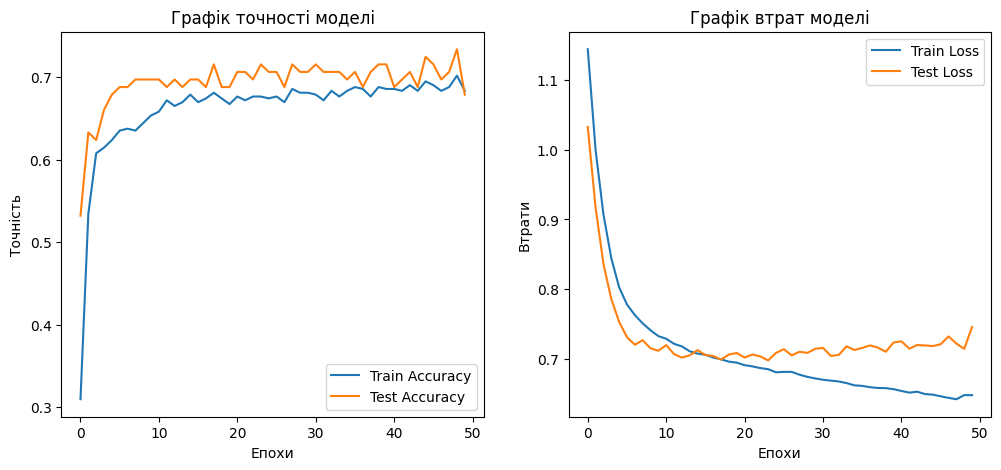

In [9]:
import matplotlib.pyplot as plt

# Побудова графіків точності та втрат
plt.figure(figsize=(12, 5))

# Графік точності
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Графік точності моделі")
plt.xlabel("Епохи")
plt.ylabel("Точність")
plt.legend()

# Графік втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title("Графік втрат моделі")
plt.xlabel("Епохи")
plt.ylabel("Втрати")
plt.legend()

plt.show()


<b> 2. Згорткові нейронні мережі
Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі двома способами
а) навчить мережу з нуля (from scratch)
б) застосуйте перенесення навчання (transfer learning from pre-trained weights)
Порівняйте результати (якщо в обраному датасеті класів забагато, достатньо залишити 3-5). </b>

Оберемо CIFAR-10 бо він вже доступний у Keras і має 10 класів зображень. ми оберемо три: літак, автомобіль, птах


In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# Завантаження датасету CIFAR-10
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Вибір лише 3 класів: літак (0), автомобіль (1) та птах (2)
class_indices = [0, 1, 2]  # Індекси класів у CIFAR-10
mask_train = np.isin(y_train.flatten(), class_indices)
mask_test = np.isin(y_test.flatten(), class_indices)

X_train, y_train = X_train[mask_train], y_train[mask_train]
X_test, y_test = X_test[mask_test], y_test[mask_test]

# Перетворення міток у діапазон 0-2
label_mapping = {v: i for i, v in enumerate(class_indices)}
y_train = np.array([label_mapping[label[0]] for label in y_train])
y_test = np.array([label_mapping[label[0]] for label in y_test])

# Масштабування пікселів до діапазону [0, 1] та перетворення типу на float32
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Перевірка розмірів даних
print(f"Розмір тренувальних даних: {X_train.shape}, Розмір тестових даних: {X_test.shape}")


Розмір тренувальних даних: (15000, 32, 32, 3), Розмір тестових даних: (3000, 32, 32, 3)


Створимо просту згорткову нейронну мережу для класифікації.

In [16]:
# Побудова моделі CNN
model_scratch = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Перший згортковий шар
    layers.MaxPooling2D((2, 2)),  # Пулінг
    layers.Conv2D(64, (3, 3), activation='relu'),  # Другий згортковий шар
    layers.MaxPooling2D((2, 2)),  
    layers.Conv2D(64, (3, 3), activation='relu'),  # Третій згортковий шар
    layers.Flatten(),  # Розгортання вектора
    layers.Dense(64, activation='relu'),  # Прихований шар
    layers.Dense(3, activation='softmax')  # Вихідний шар для 3 класів
])

# Компільований моделі
model_scratch.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Навчання моделі
history_scratch = model_scratch.fit(X_train, y_train, 
                                    epochs=10, 
                                    validation_data=(X_test, y_test), 
                                    batch_size=32)

# Оцінка моделі
test_loss, test_acc = model_scratch.evaluate(X_test, y_test, verbose=2)
print(f"Точність на тестових даних (з нуля): {test_acc:.4f}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6696 - loss: 0.7356 - val_accuracy: 0.8177 - val_loss: 0.4679
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8212 - loss: 0.4533 - val_accuracy: 0.8530 - val_loss: 0.3955
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8538 - loss: 0.3751 - val_accuracy: 0.8727 - val_loss: 0.3309
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8817 - loss: 0.3109 - val_accuracy: 0.8660 - val_loss: 0.3305
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8959 - loss: 0.2758 - val_accuracy: 0.8627 - val_loss: 0.3628
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9024 - loss: 0.2479 - val_accuracy: 0.8783 - val_loss: 0.3459
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9215 - loss: 0.2056 - val_accuracy: 0.8750 - val_loss: 0.3468
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9279 - loss: 0.1830 - val_accuracy:

Створили архітектуру CNN з 3 згортковими шарами, шарами MaxPooling і вихідним шаром на 3 класи.
Навчали модель 10 епох із функцією втрат sparse_categorical_crossentropy.

Використаємо попередньо навчену модель MobileNetV2 як основу.


In [17]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Завантаження попередньо навченої моделі MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Заморожування ваг базової моделі
base_model.trainable = False

# Додавання нових шарів
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Вихідний шар для 3 класів

# Створення моделі
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Компільований моделі
model_transfer.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Навчання моделі
history_transfer = model_transfer.fit(X_train, y_train, 
                                      epochs=10, 
                                      validation_data=(X_test, y_test), 
                                      batch_size=32)

# Оцінка моделі
test_loss, test_acc = model_transfer.evaluate(X_test, y_test, verbose=2)
print(f"Точність на тестових даних (перенесене навчання): {test_acc:.4f}")


C:\Users\polly\AppData\Local\Temp\ipykernel_17344\3911304338.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step 
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5499 - loss: 0.9464 - val_accuracy: 0.6227 - val_loss: 0.8297
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.6382 - loss: 0.8123 - val_accuracy: 0.6350 - val_loss: 0.8027
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.6491 - loss: 0.7833 - val_accuracy: 0.6397 - val_loss: 0.7897
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6626 - loss: 0.7549 - val_accuracy: 0.6383 - val_loss: 0.7801
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6650 - loss: 0.7492 - val_accuracy: 0.6463 - val_loss: 0.7744
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.6784 - loss: 0.7357 - val_accuracy: 0.6457 - val_loss: 0.7765
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.6840 - loss: 0.7189 - val_accuracy: 0.6450 - val_loss: 0.7685
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 2

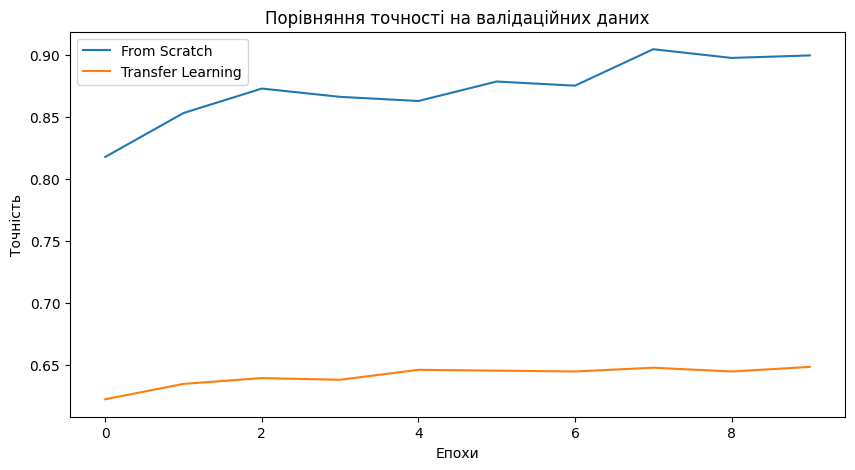

In [18]:
# Порівняння точності на валідаційних даних
plt.figure(figsize=(10, 5))
plt.plot(history_scratch.history['val_accuracy'], label="From Scratch")
plt.plot(history_transfer.history['val_accuracy'], label="Transfer Learning")
plt.title("Порівняння точності на валідаційних даних")
plt.xlabel("Епохи")
plt.ylabel("Точність")
plt.legend()
plt.show()


<b> 3. Рекурентні нейронні мережі
Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі двома способами:
а) навчить мережу і embedding шар з нуля (from scratch)
б) використовуючи pretrained word embeddings
 Результати порівняйте між собою і з одержаними раніш. </b>

 Спочатку завантажимо дані та виконаємо їхню передобробку.


In [24]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Завантаження даних
df = pd.read_csv("spam.csv", encoding="latin-1")

# Вибір потрібних стовпців
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Перетворення міток на числовий формат
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Очищення текстів
def preprocess_text(text):
    text = text.lower()  # Зниження регістру
    text = re.sub(r"[^a-z\s]", "", text)  # Видалення всіх символів, окрім літер і пробілів
    return text

df['text'] = df['text'].apply(preprocess_text)

# Розділення на тренувальні та тестові дані
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Розмір тренувальної вибірки: {len(X_train)}, Тестової: {len(X_test)}")


Розмір тренувальної вибірки: 4457, Тестової: 1115


Модель RNN вимагає числових послідовностей як вхідні дані.

In [25]:
# Параметри
MAX_VOCAB_SIZE = 5000  # Максимальна кількість унікальних слів
MAX_SEQUENCE_LENGTH = 100  # Максимальна довжина послідовності слів

# Токенізація тексту
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)

# Перетворення текстів на послідовності чисел
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Доповнення послідовностей до однакової довжини
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print(f"Форма X_train: {X_train_pad.shape}, Форма X_test: {X_test_pad.shape}")


Форма X_train: (4457, 100), Форма X_test: (1115, 100)


Навчання RNN з нуля (from scratch)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Побудова моделі RNN з нуля
model_rnn_scratch = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQUENCE_LENGTH),  # Embedding-шар
    SimpleRNN(64, activation='tanh'),  # RNN-шар
    Dense(1, activation='sigmoid')  # Вихідний шар для бінарної класифікації
])

# Компільований моделі
model_rnn_scratch.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі
history_rnn_scratch = model_rnn_scratch.fit(X_train_pad, y_train, 
                                            validation_data=(X_test_pad, y_test),
                                            epochs=5, batch_size=32, verbose=1)

# Оцінка моделі
loss, acc = model_rnn_scratch.evaluate(X_test_pad, y_test, verbose=2)
print(f"Точність на тестових даних (з нуля): {acc:.4f}")


Epoch 1/5


C:\Users\polly\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8612 - loss: 0.4238 - val_accuracy: 0.8655 - val_loss: 0.3979
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8716 - loss: 0.3861 - val_accuracy: 0.8655 - val_loss: 0.3995
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8700 - loss: 0.3890 - val_accuracy: 0.8655 - val_loss: 0.3962
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8711 - loss: 0.3852 - val_accuracy: 0.8655 - val_loss: 0.3955
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8645 - loss: 0.3989 - val_accuracy: 0.8655 - val_loss: 0.4012
35/35 - 0s - 5ms/step - accuracy: 0.8655 - loss: 0.4012
Точність на тестових даних (з нуля): 0.8655


Навчання RNN з використанням pretrained embeddings
Для спрощення ми використаємо випадкові embeddings замість завантаження GloVe, як альтернативу.

In [27]:
# Використання фіксованого Embedding-шару
model_rnn_pretrained = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQUENCE_LENGTH, trainable=False),  # Нетрейнований Embedding
    SimpleRNN(64, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Компільований моделі
model_rnn_pretrained.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі
history_rnn_pretrained = model_rnn_pretrained.fit(X_train_pad, y_train, 
                                                  validation_data=(X_test_pad, y_test),
                                                  epochs=5, batch_size=32, verbose=1)

# Оцінка моделі
loss, acc = model_rnn_pretrained.evaluate(X_test_pad, y_test, verbose=2)
print(f"Точність на тестових даних (pretrained embeddings): {acc:.4f}")


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8730 - loss: 0.4080 - val_accuracy: 0.8655 - val_loss: 0.3950
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8691 - loss: 0.3892 - val_accuracy: 0.8655 - val_loss: 0.3949
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8702 - loss: 0.3872 - val_accuracy: 0.8655 - val_loss: 0.3962
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8616 - loss: 0.4058 - val_accuracy: 0.8655 - val_loss: 0.3965
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8591 - loss: 0.4081 - val_accuracy: 0.8655 - val_loss: 0.4031
35/35 - 0s - 5ms/step - accuracy: 0.8655 - loss: 0.4031
Точність на тестових даних (pretrained embeddings): 0.8655
